In [1]:
import pandas as pd
import numpy as np

In [4]:
pwd

'C:\\Users\\Tej'

In [5]:
cd E:\

E:\


In [6]:
df=pd.read_csv("iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.dtypes


sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

In [8]:
df['class']=df['class'].astype('category')
df.dtypes


sepallength     float64
sepalwidth      float64
petallength     float64
petalwidth      float64
class          category
dtype: object

In [9]:
df['class']=df['class'].cat.codes
df


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [11]:
(df <= 0).sum()

sepallength     0
sepalwidth      0
petallength     0
petalwidth      0
class          50
dtype: int64

In [12]:
print(df.shape)

(150, 5)


In [13]:
# co-relation matrix
def DetectOutlier(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high, low = Q3+1.5*IQR, Q1-1.5*IQR
  
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  
  count = df[(df[var] > high) | (df[var] < low)][var].count()
 
  print('Total outliers in:',var,':',count)



DetectOutlier(df,'sepallength')

DetectOutlier(df,'sepalwidth')

DetectOutlier(df,'petallength')

DetectOutlier(df,'petalwidth')




Highest allowed in variable: sepallength 8.350000000000001
lowest allowed in variable: sepallength 3.1499999999999986
Total outliers in: sepallength : 0
Highest allowed in variable: sepalwidth 4.05
lowest allowed in variable: sepalwidth 2.05
Total outliers in: sepalwidth : 4
Highest allowed in variable: petallength 10.349999999999998
lowest allowed in variable: petallength -3.649999999999999
Total outliers in: petallength : 0
Highest allowed in variable: petalwidth 4.05
lowest allowed in variable: petalwidth -1.95
Total outliers in: petalwidth : 0


C:\Users\Tej\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


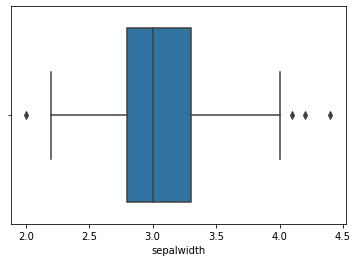

In [15]:
import seaborn as sns
sns.boxplot(df['sepalwidth'])

In [16]:
def OutlierRemoval(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  high, low = Q3+1.5*IQR, Q1-1.5*IQR
  
  print("Highest allowed in variable:", var, high)
  print("lowest allowed in variable:", var, low)
  
  count = df[(df[var] > high) | (df[var] < low)][var].count()
  
 
  print('Total outliers in:',var,':',count)
  
  df = df[((df[var] >= low) & (df[var] <= high))]
  return df




In [17]:
print(df.shape)
df = OutlierRemoval(df,'sepalwidth')
print(df.shape)


(150, 5)
Highest allowed in variable: sepalwidth 4.05
lowest allowed in variable: sepalwidth 2.05
Total outliers in: sepalwidth : 4
(146, 5)


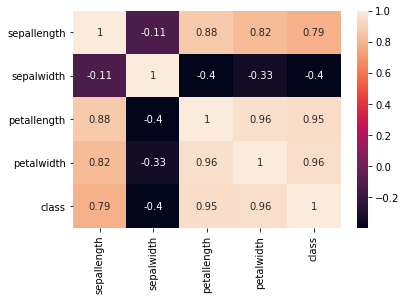

In [18]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [20]:
# split the data into inputs and outputs
X = df.iloc[:, [0,2,3]].values
y = df.iloc[:, 4].values



In [21]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)


In [22]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)



In [23]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)



In [24]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer1 = GaussianNB()

# training the model
classifer1.fit(X_train, y_train)

# testing the model
y_pred1 = classifer1.predict(X_test)


In [25]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test,y_pred1))


0.8648648648648649


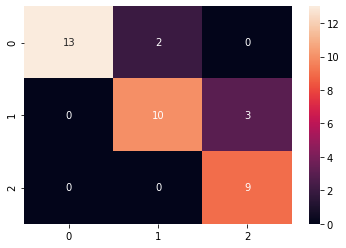

In [26]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [27]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      0.77      0.80        13
           2       0.75      1.00      0.86         9

    accuracy                           0.86        37
   macro avg       0.86      0.88      0.86        37
weighted avg       0.88      0.86      0.87        37

